In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# File paths for each dataset
business_file_path = '/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_business.json'
review_file_path = '/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_review.json'
user_file_path = '/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_user.json'
checkin_file_path = '/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_checkin.json'
tip_file_path = '/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_tip.json' '''

In [ ]:
import pandas as pd

# Loading the business dataset
businesses = pd.read_json('/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_business.json', lines=True)

# Filtering cafe businesses in Pennsylvania
cafes = businesses[(businesses['state'] == 'PA') & businesses['categories'].str.contains('Coffee & Tea|Cafes|Coffee', case=False, na=False)]
cafes.head()

In [ ]:
# Grouping by business name and count the number of occurrences
business_count = cafes.groupby('name').size().reset_index(name='count')

# Sorting businesses by their count in descending order
business_count_sorted = business_count.sort_values(by='count', ascending=False)

# Printing the top 12 business names and their counts in descending order
print(business_count_sorted[['name', 'count']].head(12))

                 name  count
357           Dunkin'    212
1221             Wawa    169
999         Starbucks    143
687        McDonald's    115
10           7-Eleven     25
604       Kung Fu Tea     11
295              Cosi      9
359    Dunkin' Donuts      8
64        Au Bon Pain      8
809      Panera Bread      8
676   Manhattan Bagel      7
402    Federal Donuts      7


In [ ]:
# Separating Starbucks and the other competitor businesses
starbucks = cafes[cafes['name'].str.contains('Starbucks', case=False, na=False)]
competitors = cafes[cafes['name'].str.contains('McDonald\'s|Dunkin|Wawa|7-Eleven|First Watch|Tim Hortons|Speedway|Dutch Bros Coffee|PJ\'s Coffee|Honey Baked Ham Company', case=False, na=False)]

In [ ]:
starbucks.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
2371,cUYw6i8MF_2WEdd2d8t9yg,Starbucks,498 North Main St,Doylestown,PA,18901,40.321777,-75.130908,2.5,31,1,"{'Alcohol': 'u'none'', 'RestaurantsAttire': 'u...","Food, Coffee & Tea","{'Monday': '5:30-19:30', 'Tuesday': '5:30-19:3..."
2888,sD2yBIzp0SNYRMD4QfH9Jw,Starbucks,1018 N 2nd St,Philadelphia,PA,19123,39.966510,-75.140377,2.5,13,1,"{'WiFi': 'u'free'', 'BusinessParking': '{u'val...","Food, Coffee & Tea","{'Monday': '6:0-17:0', 'Tuesday': '6:0-17:0', ..."


In [ ]:
competitors.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
361,aNXw3PkXVt8ANwLyCfcmpg,McDonald's,2333 Welsh Rd,Lansdale,PA,19446,40.263706,-75.317916,1.5,17,1,"{'WiFi': 'u'free'', 'GoodForKids': 'True', 'Bu...","Restaurants, Fast Food, Burgers, Food, Coffee ...","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ..."


In [ ]:
starbucks.shape

(143, 14)

In [ ]:
competitors.shape

(543, 14)

In [ ]:
# Initializing different dataframes for reviews
starbucks_reviews = pd.DataFrame()
competitor_reviews = pd.DataFrame()

# Adjusting the filtering to include both Starbucks and competitors
chunksize = 10 ** 6
for chunk in pd.read_json(review_file_path, lines=True, chunksize=chunksize):
    merged_chunk = pd.merge(chunk, businesses[['business_id', 'city']], on='business_id')
    filtered_chunk_starbucks = merged_chunk[merged_chunk['business_id'].isin(starbucks['business_id'])]
    filtered_chunk_competitors = merged_chunk[merged_chunk['business_id'].isin(competitors['business_id'])]

    # Concatenate filtered reviews with the respective DataFrames
    starbucks_reviews = pd.concat([starbucks_reviews, filtered_chunk_starbucks], ignore_index=True)
    competitor_reviews = pd.concat([competitor_reviews, filtered_chunk_competitors], ignore_index=True)

In [ ]:
starbucks_reviews.to_json('/content/drive/MyDrive/Colab Notebooks/starbucks_reviews_PA.json', orient='records', lines=True)
competitor_reviews.to_json('/content/drive/MyDrive/Colab Notebooks/competitor_reviews_PA.json', orient='records', lines=True)

In [ ]:
import pandas as pd

starbucks_reviews_file = '/content/drive/MyDrive/Colab Notebooks/starbucks_reviews_PA.json'
competitor_reviews_file = '/content/drive/MyDrive/Colab Notebooks/competitor_reviews_PA.json'

starbucks_reviews = pd.read_json(starbucks_reviews_file, lines=True)
competitor_reviews = pd.read_json(competitor_reviews_file, lines=True)

In [ ]:
starbucks_reviews.shape

(4052, 10)

In [ ]:
competitor_reviews.shape

(9724, 10)

In [ ]:
!pip install bertopic

#*Starbucks' Reviews Analysis*

In [ ]:
starbucks_reviews.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,city
0,LpeHIlju3NnNqNiRYlsbvg,Z4IzIdOTsv2wE9Z6KVrGWQ,AEgaEEWNGuXWBHUkf_fN3A,1,0,0,0,Wallet was stolen today at this starbucks. Th...,2010-11-22 23:05:03,Philadelphia
1,5ycLlVriKOIIR3xpRybmXw,o8efrQpEItVYBrWfdjTGnw,AEgaEEWNGuXWBHUkf_fN3A,5,0,0,0,First time here he is so kind and explain real...,2017-06-07 17:42:12,Philadelphia


In [ ]:
import pandas as pd
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
reviews = starbucks_reviews

# Basic text processing steps such as tokenization, lowercase conversion, stopword removal
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [w for w in tokens if not w in stop_words]
    return filtered_tokens

reviews['tokens'] = reviews['text'].apply(preprocess)

In [ ]:
!pip install wordcloud matplotlib numpy
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
all_reviews = ' '.join([' '.join(tokens) for tokens in reviews['tokens']])

In [ ]:
# Loading the mask image
mask_image = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/istockphoto-1334740428-612x612.png"))

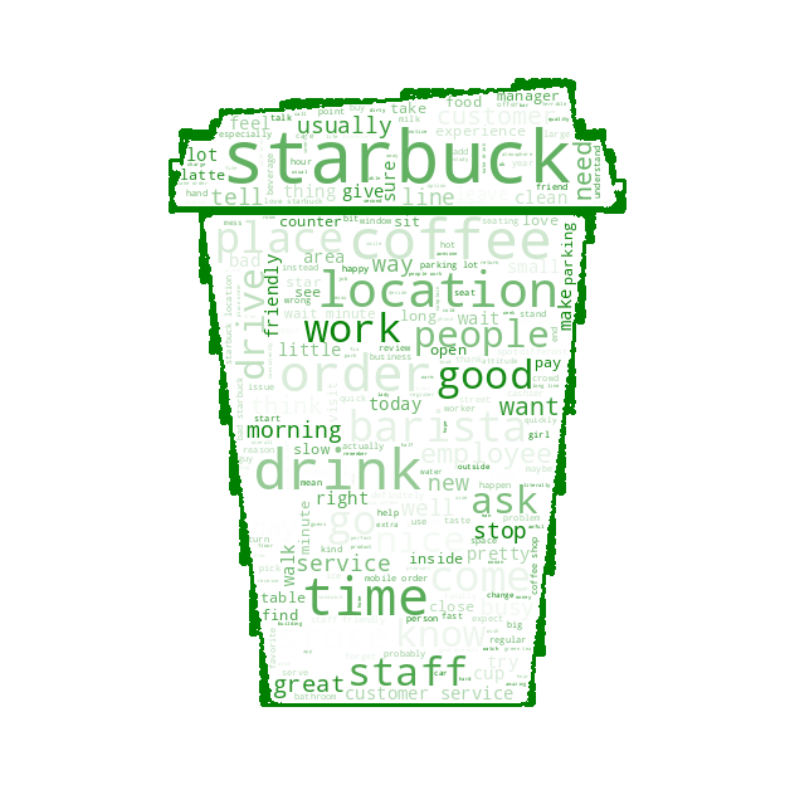

In [ ]:
# Defining additional stopwords if necessary
additional_stopwords = set(STOPWORDS)

# Creating a custom dark green-to-white colormap
colors = [(0, 0.5, 0), (1, 1, 1)]
cmap = LinearSegmentedColormap.from_list('dark_green_to_white', colors)

# Creating the word cloud
wordcloud = WordCloud(stopwords=additional_stopwords, background_color="white", max_words=1000, mask=mask_image, contour_width=3, contour_color='green', colormap=cmap)
wordcloud.generate(all_reviews)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
# Basic text procesing techniques
nlp = spacy.load("en_core_web_lg")
def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)
data['text'] = data['text'].apply(normalize, lowercase=True, remove_stopwords=True)

In [ ]:
# Defining the BERTopic model
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7, calculate_probabilities=True)
topics, probs = model.fit_transform(data.text)

2024-02-27 08:09:11,915 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/127 [00:00<?, ?it/s]

2024-02-27 08:10:18,561 - BERTopic - Embedding - Completed ✓
2024-02-27 08:10:18,564 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-27 08:10:58,919 - BERTopic - Dimensionality - Completed ✓
2024-02-27 08:10:58,920 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-27 08:10:59,261 - BERTopic - Cluster - Completed ✓
2024-02-27 08:10:59,273 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-27 08:10:59,564 - BERTopic - Representation - Completed ✓


CPU times: user 2min 3s, sys: 2.59 s, total: 2min 6s
Wall time: 2min 11s


In [ ]:
from bertopic.representation import KeyBERTInspired
zeroshot_topic_list = ["pricing", "service", "seating", "ambiance", "quality", "variety", "waittime", "queue", "dining", "parking", 'clean', 'taste']

# Fitting the model using pre-defined zero-shot topics
topic_model = BERTopic(
    embedding_model="thenlper/gte-small",
    min_topic_size=5,
    zeroshot_topic_list=zeroshot_topic_list,
    zeroshot_min_similarity=.75,
    representation_model=KeyBERTInspired()
)
topics, _ = topic_model.fit_transform(data.text)

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
topic_model.visualize_barchart(top_n_topics=12)

In [ ]:
docs=data['text']
classes=data['stars']
#Create topics per class
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

In [ ]:
# Createing a new column called "Sentiment" based on the "stars" column
data['Sentiment'] = data['stars'].apply(lambda x: 'Negative' if x in [1, 2] else 'Neutral' if x == 3 else 'Positive')

# Displaying the updated dataframe
data.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,city,Sentiment
0,LpeHIlju3NnNqNiRYlsbvg,Z4IzIdOTsv2wE9Z6KVrGWQ,AEgaEEWNGuXWBHUkf_fN3A,1,0,0,0,wallet steal today starbuck . worker helpful...,2010-11-22 23:05:03,Philadelphia,Negative
1,5ycLlVriKOIIR3xpRybmXw,o8efrQpEItVYBrWfdjTGnw,AEgaEEWNGuXWBHUkf_fN3A,5,0,0,0,time kind explain good love table buy tea cuz ...,2017-06-07 17:42:12,Philadelphia,Positive


In [ ]:
docs=data['text']
classes=data['Sentiment']
# Creating topics per class
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

#*Competitors' Reviews Analysis*

In [ ]:
competitor_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,city,Sentiment
0,40thYphUgIfvJq17QCfTwA,QzCEzH3R7Z6erOGLr3t55Q,0pMj5xUAecW9o1P35B0AMw,5,1,0,1,great staff help nice . clean huge store size ...,2017-05-26 13:10:24,Norristown,Positive
1,VCcR8AvHQt32sstRcytomA,bVdhHJT6cr4L3cXxUBjjqg,0pMj5xUAecW9o1P35B0AMw,1,0,0,0,bad wawa wen . entrance / exit cause traffic m...,2014-10-20 21:25:22,Norristown,Negative
2,qfkCbGO0qfbANVjobZ8D5w,6I_DA3uqOox50rBvjrQ_-g,0pMj5xUAecW9o1P35B0AMw,5,0,0,0,wawa open recently definitely nice . good job !,2014-10-10 12:11:06,Norristown,Positive
3,TWjbg-THyngwRXCgjaTBQQ,Y5C5c1hbLzsFFmeFztIK-w,0pMj5xUAecW9o1P35B0AMw,1,0,0,0,expect employee food prep counter baseball cap...,2020-06-02 15:40:19,Norristown,Negative
4,x9B8Jhnuw6OylohBkpSXjw,Q7Y8hneE9LFOJAMbnYVkOw,0pMj5xUAecW9o1P35B0AMw,3,0,0,0,time breakfast sandwich sell wait 20 minute \n...,2019-08-24 14:01:28,Norristown,Neutral


In [ ]:
import pandas as pd
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
reviews = competitor_reviews

# Basic text processing techniques such as tokenization, lowercase conversion and stopqord removal
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [w for w in tokens if not w in stop_words]
    return filtered_tokens

reviews['tokens'] = reviews['text'].apply(preprocess)

In [ ]:
!pip install wordcloud matplotlib numpy
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
all_reviews = ' '.join([' '.join(tokens) for tokens in reviews['tokens']])

In [ ]:
# Loading the mask image
mask_image = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/istockphoto-1334740428-612x612.png"))

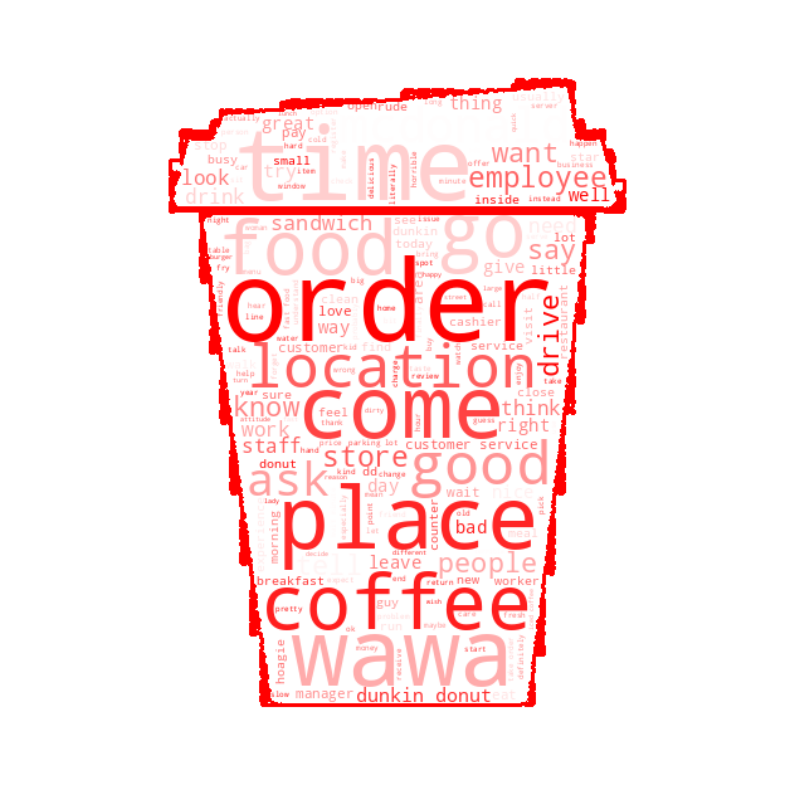

In [ ]:
# Defining additional stopwords if necessary
additional_stopwords = set(STOPWORDS)

# Creating a custom red-to-white colormap
colors = [(1, 0, 0), (1, 1, 1)]  # Red to white
cmap = LinearSegmentedColormap.from_list('red_to_white', colors)

# Creating the word cloud
wordcloud = WordCloud(stopwords=additional_stopwords, background_color="white", max_words=1000, mask=mask_image, contour_width=3, contour_color='red', colormap=cmap)
wordcloud.generate(all_reviews)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Basic text processing techniques
nlp = spacy.load("en_core_web_lg")
def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)
data['text'] = data['text'].apply(normalize, lowercase=True, remove_stopwords=True)

In [ ]:
from bertopic import BERTopic
topic_model = BERTopic(verbose=True)

# Ensureing data.text is a list of documents
print(f"Number of documents: {len(data.text)}")

# Fiting the model on a subset if necessary to debug
topics, _ = topic_model.fit_transform(data.text[:10])

2024-02-27 09:01:31,597 - BERTopic - Embedding - Transforming documents to embeddings.


Number of documents: 9724


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-02-27 09:01:35,570 - BERTopic - Embedding - Completed ✓
2024-02-27 09:01:35,572 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-27 09:01:38,320 - BERTopic - Dimensionality - Completed ✓
2024-02-27 09:01:38,322 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-27 09:01:38,351 - BERTopic - Cluster - Completed ✓
2024-02-27 09:01:38,358 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-27 09:01:38,374 - BERTopic - Representation - Completed ✓


In [ ]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
zeroshot_topic_list = ["pricing", "service", "seating", "ambiance", "quality", "variety", "waittime", "queue", "dining", "parking", 'clean', 'taste']

# Fitting our model using the pre-defined zero-shot topics
topic_model = BERTopic(
    verbose=True,
    embedding_model="thenlper/gte-small",
    min_topic_size=5,
    zeroshot_topic_list=zeroshot_topic_list,
    zeroshot_min_similarity=.50,
    representation_model=KeyBERTInspired(),
    umap_model="pca")
topics, _ = topic_model.fit_transform(data.text)

2024-02-27 09:01:43,733 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/304 [00:00<?, ?it/s]

2024-02-27 09:14:07,263 - BERTopic - Embedding - Completed ✓
2024-02-27 09:14:07,266 - BERTopic - Zeroshot Step 1 - Finding documents that could be assigned to either one of the zero-shot topics
2024-02-27 09:14:07,490 - BERTopic - Zeroshot Step 2 - Clustering documents that were not found in the zero-shot model...
2024-02-27 09:14:07,500 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-27 09:14:07,504 - BERTopic - Dimensionality - Completed ✓
2024-02-27 09:14:07,536 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-27 09:14:07,545 - BERTopic - Cluster - Completed ✓
2024-02-27 09:14:07,554 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-27 09:14:48,140 - BERTopic - Representation - Completed ✓
2024-02-27 09:14:48,333 - BERTopic - Zeroshot Step 2 - Completed ✓
2024-02-27 09:14:48,335 - BERTopic - Zeroshot Step 3 - Combining clustered topics with the zeroshot model


In [ ]:
topic_model.visualize_barchart(top_n_topics=12)

In [ ]:
data.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,city
0,40thYphUgIfvJq17QCfTwA,QzCEzH3R7Z6erOGLr3t55Q,0pMj5xUAecW9o1P35B0AMw,5,1,0,1,great staff help nice . clean huge store size ...,2017-05-26 13:10:24,Norristown
1,VCcR8AvHQt32sstRcytomA,bVdhHJT6cr4L3cXxUBjjqg,0pMj5xUAecW9o1P35B0AMw,1,0,0,0,bad wawa wen . entrance / exit cause traffic m...,2014-10-20 21:25:22,Norristown


In [ ]:
docs=data['text']
classes=data['stars']
# Creating topics per class
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

5it [02:11, 26.37s/it]


In [ ]:
# Creating a new column called "Sentiment" based on the "stars" column
data['Sentiment'] = data['stars'].apply(lambda x: 'Negative' if x in [1, 2] else 'Neutral' if x == 3 else 'Positive')

# Displaying the updated dataframe
data.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,city,Sentiment
0,40thYphUgIfvJq17QCfTwA,QzCEzH3R7Z6erOGLr3t55Q,0pMj5xUAecW9o1P35B0AMw,5,1,0,1,great staff help nice . clean huge store size ...,2017-05-26 13:10:24,Norristown,Positive
1,VCcR8AvHQt32sstRcytomA,bVdhHJT6cr4L3cXxUBjjqg,0pMj5xUAecW9o1P35B0AMw,1,0,0,0,bad wawa wen . entrance / exit cause traffic m...,2014-10-20 21:25:22,Norristown,Negative


In [ ]:
docs=data['text']
classes=data['Sentiment']
# Creating topics per class
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

3it [01:04, 21.47s/it]
